# Naive Bayes baseline

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_pd = pd.read_csv("train_2022.csv")
train_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,145506,1,0,0,1,0,0,0,The rare liquor leakage syndrome with cranial ...
1,145506,2,0,0,1,0,0,0,This does not occur after a suboccipital punct...
2,145506,3,1,0,0,0,0,0,A report is given on three cases with differen...
3,145506,4,0,0,0,1,0,0,The prognosis of the eye-muscle paresis is good.
4,145506,5,0,0,0,1,0,0,Restitutio ad integrum resulted.


In [3]:
labels = ['population','intervention','background','outcome','study design','other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[584, 501, 1777, 3192, 167, 2424]


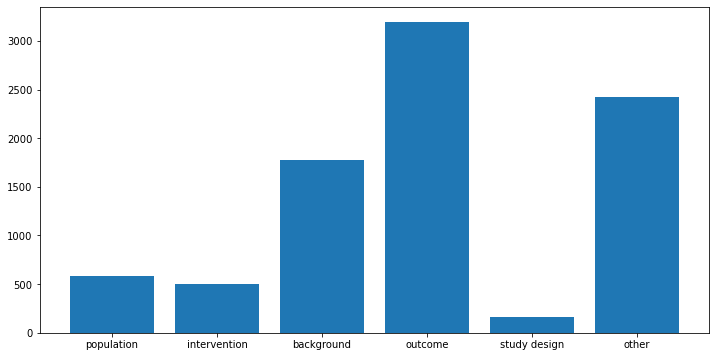

In [4]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

In [5]:
n=len(train_pd)
n

8216

## Naive Bayes

The following code trains a separate Naive Bayes classifier for each label. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

labels = ['population','intervention','background','outcome','study design','other']
nb = dict()

tfidf = TfidfVectorizer(input='contents', max_features=10000)
train_tfidf = tfidf.fit_transform(train_pd['Text'])


for l in labels:
    nb[l] = MultinomialNB()
    nb[l].fit(train_tfidf, train_pd[l])
 

The following code applies the Naive Bayes models to the test data, and saves the result in a CSV file for submission.

In [7]:
test_pd = pd.read_csv("val_2022.csv")
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2545507,2,NaN,NaN,NaN,NaN,NaN,NaN,Field electrical stimulation elicited an incre...
2,2545507,3,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2545507,4,NaN,NaN,NaN,NaN,NaN,NaN,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,NaN,NaN,NaN,NaN,NaN,NaN,3


In [8]:
test_tfidf = tfidf.transform(test_pd['Text'])

for l in labels:
    test_probabilities = [p[1] for p in nb[l].predict_proba(test_tfidf)]
    test_pd[l] = test_probabilities
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,0.071081,0.060979,0.216285,0.388510,0.020326,0.295034,1
1,2545507,2,0.050553,0.042924,0.285558,0.451349,0.006784,0.091610,Field electrical stimulation elicited an incre...
2,2545507,3,0.071081,0.060979,0.216285,0.388510,0.020326,0.295034,2
3,2545507,4,0.009772,0.021176,0.072508,0.658349,0.000844,0.033827,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,0.071081,0.060979,0.216285,0.388510,0.020326,0.295034,3


In [9]:
test_pd.to_csv('nb_val_2022_probabilities.csv', index=False)

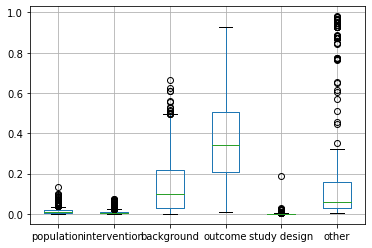

In [10]:
test_pd.boxplot(column=labels)